<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_week3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 深度神经网络理解

一. 异或门问题

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype=torch.float32)

In [ ]:
andgate = torch.tensor([0,0,0,1],dtype=torch.float32)

Text(0.5, 1.0, 'AndGate')

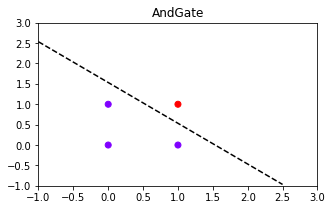

In [ ]:
# 与门决策边界
plt.figure(figsize=(5,3))
plt.scatter(X[:,1],
      X[:,2],
      c=andgate, # 颜色=真实标签的类别
      cmap="rainbow")
plt.xlim(-1,3)
plt.ylim(-1,3)
import numpy as np
x = np.arange(-1,3,0.5)
plt.plot(x,(0.23-0.15*x)/0.15,color="k",linestyle="--")
plt.title('AndGate')

Text(0.5, 1.0, 'ORGate')

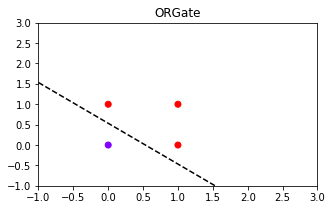

In [ ]:
# 或门决策边界
orgate = torch.tensor([0,1,1,1],dtype=torch.float32)
plt.figure(figsize=(5,3))
plt.scatter(X[:,1],
      X[:,2],
      c=orgate, # 颜色=真实标签的类别
      cmap="rainbow")
x = np.arange(-1,3,0.5)
plt.plot(x,(0.08-0.15*x)/0.15,color="k",linestyle="--")
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title('ORGate')

Text(0.5, 1.0, 'NAND GATE')

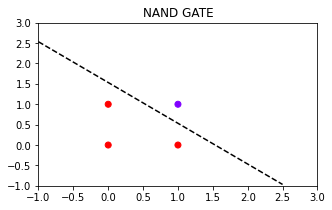

In [ ]:
# 与非门决策边界
NAND = torch.tensor([1,1,1,0],dtype=torch.float32)
plt.figure(figsize=(5,3))
plt.scatter(X[:,1],
      X[:,2],
      c=NAND, # 颜色=真实标签的类别
      cmap="rainbow")
x = np.arange(-1,3,0.5)
plt.plot(x,(0.23-0.15*x)/0.15,color="k",linestyle="--")
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title('NAND GATE')

异或门实现

In [ ]:
def NAND(X):
  w = torch.tensor([0.23,-0.15,-0.15],dtype=torch.float32)
  zhat = torch.mv(X,w)
  yhat = torch.tensor([int(x) for x in zhat>=0],dtype=torch.float32)
  return yhat

def OR(X):
  w = torch.tensor([-0.08,0.15,0.15],dtype=torch.float32)
  zhat = torch.mv(X,w)
  yhat = torch.tensor([int(x) for x in zhat >=0],dtype=torch.float32)
  return yhat
  
def AND(X):
  w = torch.tensor([-0.2,0.15,0.15],dtype=torch.float32)
  zhat = torch.mv(X,w)
  yhat = torch.tensor([int(x) for x in zhat >=0],dtype=torch.float32)
  return yhat

In [ ]:
def XOR(X):
  x1 = NAND(X).reshape(-1,1)
  x2 = OR(X).reshape(-1,1)
  x0 = torch.tensor([1,1,1,1],dtype=torch.float32).reshape(-1,1)
  input = torch.cat((x0,x1,x2),dim=1)
  output = AND(input)
  return output

In [ ]:
XOR(X)

tensor([0., 1., 1., 0.])

隐藏层的激活函数影响结果，而输出层的激活函数对结果无影响(只是对判断的阈值有影响）

In [ ]:
from torch._C import dtype
def NAND(X):
  w = torch.tensor([0.23,-0.15,-0.15],dtype=torch.float32)
  zhat = torch.mv(X,w)
  yhat = torch.tensor([int(x) for x in zhat>=0],dtype=torch.float32)
  return yhat

def OR(X):
  w = torch.tensor([-0.08,0.15,0.15],dtype=torch.float32)
  zhat = torch.mv(X,w)
  yhat = torch.tensor([int(x) for x in zhat >=0],dtype=torch.float32)
  return yhat
  
def AND(X):
  w = torch.tensor([-0.2,0.15,0.15],dtype=torch.float32)
  zhat = torch.mv(X,w)
  yhat = torch.sigmoid(zhat)
  andhat = torch.tensor([int(x) for x in yhat >= 0.5],dtype=torch.float32)
  return andhat

In [ ]:
def XOR(X):
  x1 = NAND(X).reshape(-1,1)
  x2 = OR(X).reshape(-1,1)
  x0 = torch.tensor([1,1,1,1],dtype=torch.float32).reshape(-1,1)
  input = torch.cat((x0,x1,x2),dim=1)
  output = AND(input)
  return output

In [ ]:
XOR(X)

tensor([0., 1., 1., 0.])

# 实现深度神经网络的正向传播

假设有500个样本，20个特征，3分类

三层神经网络：第一层13个神经元(relu)；第二层八个神经元(sigmoid)；第三层输出层

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# 创建数据
torch.random.manual_seed(420)
X = torch.rand((500,20),dtype=torch.float32)
y = torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32) # 前开后必 0，1，2三分类

In [ ]:
# 继承nn.Module类定义神经网络架构

class Model(nn.Module):
  # init: 定义类本身，__init__函数是在类被实例化的瞬间就会执行的函数
  def __init__(self,in_features=10,out_features=2):
    # in_features: 输入神经网络的特征数目
    # out_features: 输出层上的神经网络的数目
    super(Model,self).__init__() # super(请查找这个类的父类，请使用找到的父类替换现在的类)
    self.linear1 = nn.Linear(in_features,13,bias=True)
    self.linear2 = nn.Linear(13,8,bias=True)
    self.output = nn.Linear(8,out_features,bias=True)
  
  def forward(self,x):
    z1 = self.linear1(x)
    sigma1 = torch.relu(z1)
    z2 = self.linear2(sigma1)
    sigma2 = torch.sigmoid(z2)
    z3 = self.output(sigma2)
    sigma3 = torch.softmax(z3,dim=1)
    return sigma3

input_ = X.shape[1]
output_ = len(y.unique()) # unique()函数返回列表中独一无二的值(适用于多分类)

In [ ]:
torch.random.manual_seed(420)
net = Model(in_features=input_,out_features=output_)

In [ ]:
net.forward(X)

tensor([[0.4140, 0.3496, 0.2365],
        [0.4210, 0.3454, 0.2336],
        [0.4011, 0.3635, 0.2355],
        ...,
        [0.4196, 0.3452, 0.2352],
        [0.4153, 0.3455, 0.2392],
        [0.4153, 0.3442, 0.2405]], grad_fn=<SoftmaxBackward0>)

输入层：X(500,20)

第一层：w(13,20)*(20,500)—>(13,500)

第二层：w(8,13)*(13,500)—>(8,500)

输出层：w(3,8)*(8,500)—>(3,500)—>(500,3)

In [ ]:
net.linear1.weight.shape # X(500,20)—>w(20,500)

torch.Size([13, 20])

In [ ]:
net.linear2.weight.shape # w()

torch.Size([8, 13])

In [ ]:
net.output.weight.shape

torch.Size([3, 8])

# 子类、父类与super()函数

In [ ]:
# 创建一个父类
class FooParent(object):
  # __init__函数类实例化后会瞬间执行
  def __init__(self):
    self.parent = "PARENT!!" # 表示FooParent类的一个属性
    print("Running__init__,I am parent")
  def bar(self,message):
    self.bar = "This is a bar"
    print("%s from Parent" % message)

In [ ]:
FooParent() # 父类实例化瞬间，运行自己的__init__

Running__init__,I am parent


In [ ]:
FooParent().parent # 调用父类定义的属性，同时实例化的也同时执行

Running__init__,I am parent


'PARENT!!'

In [ ]:
# 建立一个子类，并通过类名调用让子类继承父类的方法和属性
class FooChild(FooParent):
  def __init__(self):
    print("Running__init__, I am child")

In [ ]:
FooChild()

Running__init__, I am child


In [ ]:
 FooChild().bar("hahahaha") # 子类继承了父类bar方法

Running__init__, I am child
hahahaha from Parent


In [ ]:
FooChild().parent # 但子类并不继承父类的__init__函数

Running__init__, I am child


AttributeError: ignored

<font color = "red">单纯的类名调用中，子类只能继承父类中‘__init__’方法以外的方法，无法调用父类中的‘__init__’方法(上例中的parent属性无法调用）</font>

In [ ]:
# 新建一个带super()函数的子类
class FooChild1(FooParent):
  def __init__(self):
    super(FooChild1,self).__init__() # 找到父类中的__init__方法中并复制给FooChild类
    print("child")
    print("I am running the __init__")

In [ ]:
FooChild1() # 实例化执行父类和子类的__init__函数

Running__init__,I am parent
child
I am running the __init__


In [ ]:
FooChild1().parent # 继承了父类中的__init__函数

Running__init__,I am parent
child
I am running the __init__


'PARENT!!'

In [ ]:
net.cuda()

Model(
  (linear1): Linear(in_features=20, out_features=13, bias=True)
  (linear2): Linear(in_features=13, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=3, bias=True)
)

In [21]:
net.linear1.weight

Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [18]:
def initial_0(m):
  print(m)
  if type(m) == nn.Linear:
    m.weight.data.fill_(0)
    print(weight)

In [19]:
net.apply(initial_0) # 对神经网络中所有层，init函数中所有对象都执行同样操作(批量处理)
# 对三层同时应用

Linear(in_features=20, out_features=13, bias=True)
Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.

Model(
  (linear1): Linear(in_features=20, out_features=13, bias=True)
  (linear2): Linear(in_features=13, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=3, bias=True)
)

In [20]:
for param in net.parameters():
  print(param)
# 包括神经层中的所有参数(权重和偏置)

Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0